In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



%matplotlib inline

%matplotlib inline
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [114]:
df.dtypes
#From the above table we can say that [Attrition, BusinessTravel, Department, EducationField,
#Gender, JobRole, MaritalStatus, Over18, OverTime are categorical variables.

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [115]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [116]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [117]:
df = df.drop(["EmployeeCount","StandardHours","Over18","EmployeeNumber"],axis=1)

In [118]:
def corrcof(a,b):
    return np.array(np.cov(a,b)/ (np.std(a) * np.std(b)))
def convert(d):
        switcher = {
            'Yes': 1,
            'No':  0,
            'Married' : 2,
            'Single' : 1,
            'Divorced' : 0}
        return switcher.get(d)
df["Attrition"] = df["Attrition"].apply(convert)
df["OverTime"] = df["OverTime"].apply(convert)
df["MaritalStatus"] = df["MaritalStatus"].apply(convert)

In [119]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [120]:
x_attributes = [df.Age, df.WorkLifeBalance, df.DailyRate, df.DistanceFromHome, df.Education, df.EnvironmentSatisfaction, df.PerformanceRating, 
                df.RelationshipSatisfaction, df.StockOptionLevel, df.TotalWorkingYears, df.TrainingTimesLastYear, 
                df.WorkLifeBalance, df.YearsAtCompany, df.YearsInCurrentRole, df.YearsSinceLastPromotion, 
                df.YearsWithCurrManager, df.OverTime, df.NumCompaniesWorked, df.PercentSalaryHike, df.MonthlyRate, 
                df.MonthlyIncome, df.MaritalStatus, df.HourlyRate, df.JobInvolvement, df.JobLevel, df.JobSatisfaction]

def corr_each(a,b):
    j = 0
    for i in b:
        print()
        print(f"{a.name} and {b[j].name} " + f"({corrcof(a,i)[0,1]})")
        j=j+1

In [121]:
corr_each(df.Attrition, x_attributes)


Attrition and Age (-0.15931338331701492)

Attrition and WorkLifeBalance (-0.06398257277712098)

Attrition and DailyRate (-0.05669055687230406)

Attrition and DistanceFromHome (0.07797662828106453)

Attrition and Education (-0.031394176222513455)

Attrition and EnvironmentSatisfaction (-0.10343934523945929)

Attrition and PerformanceRating (0.0028907181860373075)

Attrition and RelationshipSatisfaction (-0.04590350575578964)

Attrition and StockOptionLevel (-0.1372382783063231)

Attrition and TotalWorkingYears (-0.17117969490827203)

Attrition and TrainingTimesLastYear (-0.059518287187159916)

Attrition and WorkLifeBalance (-0.06398257277712098)

Attrition and YearsAtCompany (-0.13448369949984046)

Attrition and YearsInCurrentRole (-0.1606542929023274)

Attrition and YearsSinceLastPromotion (-0.033041252184886793)

Attrition and YearsWithCurrManager (-0.1563056462732422)

Attrition and OverTime (0.24628553542636483)

Attrition and NumCompaniesWorked (0.04352334677670912)

Attrition and

In [122]:
#logistic regression
df.Attrition.value_counts()/1470*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

In [123]:
df.groupby("Attrition").mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,1.239254,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,1.215190,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


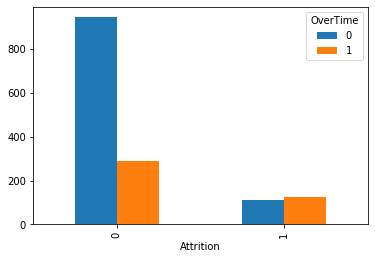

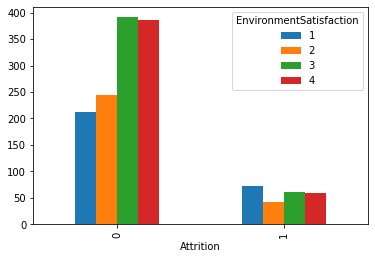

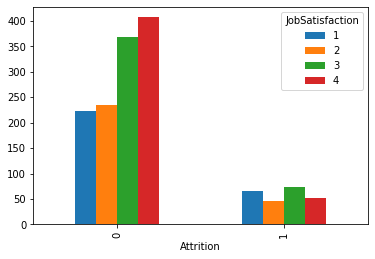

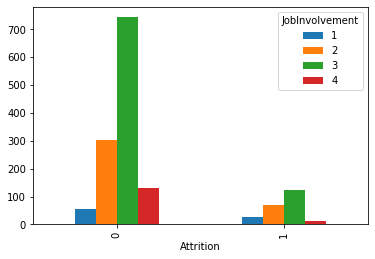

In [124]:

pd.crosstab(df.Attrition, df.OverTime).plot.bar()
pd.crosstab(df.Attrition, df.EnvironmentSatisfaction).plot.bar()
pd.crosstab(df.Attrition, df.JobSatisfaction).plot.bar()
pd.crosstab(df.Attrition, df.JobInvolvement).plot.bar()

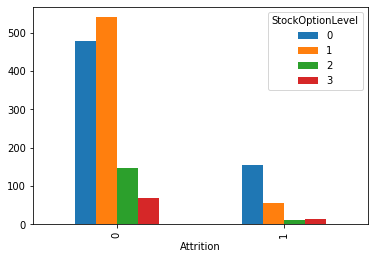

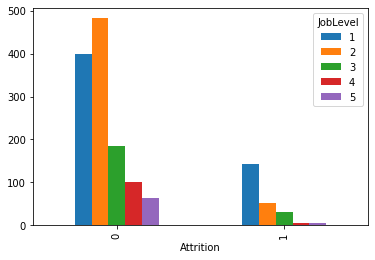

In [125]:
pd.crosstab(df.Attrition,df.StockOptionLevel).plot.bar()
pd.crosstab(df.Attrition, df.JobLevel).plot.bar()

In [126]:
x_attr = ['JobLevel','StockOptionLevel','JobSatisfaction','EnvironmentSatisfaction','OverTime','Age','TotalWorkingYears','YearsAtCompany','MonthlyIncome']
df_y = df['Attrition']
df_x = df[x_attr]

In [127]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.5, random_state=0)
#X_train = scale(X_train[['MonthlyIncome','Age','TotalWorkingYears','YearsAtCompany']])
#X_test = scale(X_test[['MonthlyIncome','Age','TotalWorkingYears','YearsAtCompany']])
logr = LogisticRegression(max_iter=1000)
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
accuracy_score(y_test,y_pred)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8585034013605443

In [128]:
confusion_matrix(y_test, y_pred)
p = pd.DataFrame(y_pred)
p[0].value_counts()

0    719
1     16
Name: 0, dtype: int64

In [129]:
logr.score(X_test, y_test)*100

85.85034013605443

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       623
           1       0.75      0.11      0.19       112

    accuracy                           0.86       735
   macro avg       0.81      0.55      0.56       735
weighted avg       0.84      0.86      0.81       735



In [131]:
acc1 = cross_val_score(logr,df_x, df_y, cv=10, scoring='accuracy') #Cross Validation to check if our model is prone to Overfitting.
acc1.mean()*100

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

84.76102325417394

In [132]:
#knn model
knn = KNeighborsClassifier(n_neighbors = 10,metric ='euclidean')
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.5, random_state=0)
knn.fit(X_train, y_train)
y_predi = knn.predict(X_test)
confusion_matrix(y_test,y_predi)
knn.score(X_test, y_test)

0.8448979591836735

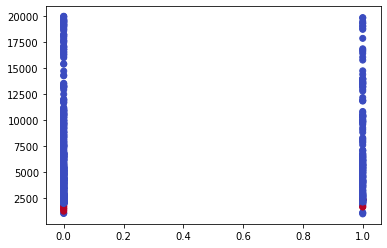

In [133]:
plt.scatter(X_test['OverTime'],X_test['MonthlyIncome'],c=y_predi, cmap = 'coolwarm')

In [134]:
df_y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [135]:
print(classification_report(y_test,y_predi))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       623
           1       0.42      0.04      0.08       112

    accuracy                           0.84       735
   macro avg       0.63      0.52      0.50       735
weighted avg       0.79      0.84      0.79       735



In [136]:
acc2 = cross_val_score(knn, df_x, df_y, scoring='accuracy', cv=10) #Cross Validation to check if our model is prone to Overfitting.
acc2.mean()*100

83.47124521782057

In [137]:
def logi_reg(x_var, y_var, t_size) :
    X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size = t_size, random_state =2)
    lr = LinearRegression(max_iter = 1000).fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    score = accuracy_score(y_pred, y_test)      #This gives us the accuracy score of these predictions
    c_report = classification_report(y_test, y_pred)      #This report displays the F1-Measure, Precision, Recall
    
    return lr

In [138]:
def knn_class(x_var, y_var, t_size, k):
    X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size = t_size, random_state = 2)
    knn = KNeighborsClassifier(n_neighbours = k, metric = 'euclidean').fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_pred, y_test)             #This gives us the accuracy score of these predictions
    c_report = classification_report(y_test, y_pred)   #This report displays the F1-Measure, Precision, Recall
    
    return knn

In [139]:
#hyperparameter
df["Attrition"].value_counts()/1470*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

In [140]:
print(classification_report(y_test,y_predi))  #kNN Classifier

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       623
           1       0.42      0.04      0.08       112

    accuracy                           0.84       735
   macro avg       0.63      0.52      0.50       735
weighted avg       0.79      0.84      0.79       735



In [141]:
print(classification_report(y_test,y_pred)) #LogisticRegression

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       623
           1       0.75      0.11      0.19       112

    accuracy                           0.86       735
   macro avg       0.81      0.55      0.56       735
weighted avg       0.84      0.86      0.81       735



In [142]:
def encode(d):
    switcher={
        'Yes': 1,
        'No': 0
    }
    return switcher.get(d)

df['Attrition'] = df['Attrition'].apply(encode)
df['OverTime'] = df['OverTime'].apply(encode)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,None,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,None,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,None,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,None,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,None,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [143]:
df_x = df[['JobLevel','StockOptionLevel','JobSatisfaction','EnvironmentSatisfaction','OverTime','Age','TotalWorkingYears','YearsAtCompany','MonthlyIncome']]
df_y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state =0 )

In [144]:
X = pd.concat([X_train,y_train],axis=1)
X

,JobLevel,StockOptionLevel,JobSatisfaction,EnvironmentSatisfaction,OverTime,Age,TotalWorkingYears,YearsAtCompany,MonthlyIncome,Attrition
338,2,3,3,4,None,30,10,10,6118,None
363,1,0,3,4,None,33,1,1,2851,None
759,1,0,2,2,None,45,6,6,2177,None
793,1,1,3,1,None,28,4,4,2207,None
581,1,2,3,4,None,30,7,2,3833,None
...,...,...,...,...,...,...,...,...,...,...
763,1,1,3,3,None,34,1,1,2220,None
835,1,0,3,3,None,35,6,5,4323,None
1216,2,1,4,4,None,43,10,10,7847,None
559,1,1,3,4,None,38,6,1,3057,None
